In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

In [ ]:
df = web.DataReader('GOOGL', data_source='yahoo' , start='2012-01-01', end='2020-10-01' )
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,334.409424,326.511505,326.796783,333.038025,7345600.0,333.038025
2012-01-04,335.460449,330.640656,332.847839,334.474487,5722200.0,334.474487
2012-01-05,332.317322,328.443451,331.396393,329.834839,6559200.0,329.834839
2012-01-06,330.330322,325.220215,329.904907,325.335327,5380400.0,325.335327
2012-01-09,323.823822,310.925934,323.573578,311.541534,11633500.0,311.541534
...,...,...,...,...,...,...
2020-09-25,1445.939941,1407.680054,1425.050049,1439.060059,1516300.0,1439.060059
2020-09-28,1472.989990,1446.280029,1471.989990,1458.660034,1539200.0,1458.660034
2020-09-29,1472.000000,1454.000000,1463.910034,1466.020020,1590800.0,1466.020020


In [ ]:
df.shape

(2202, 6)

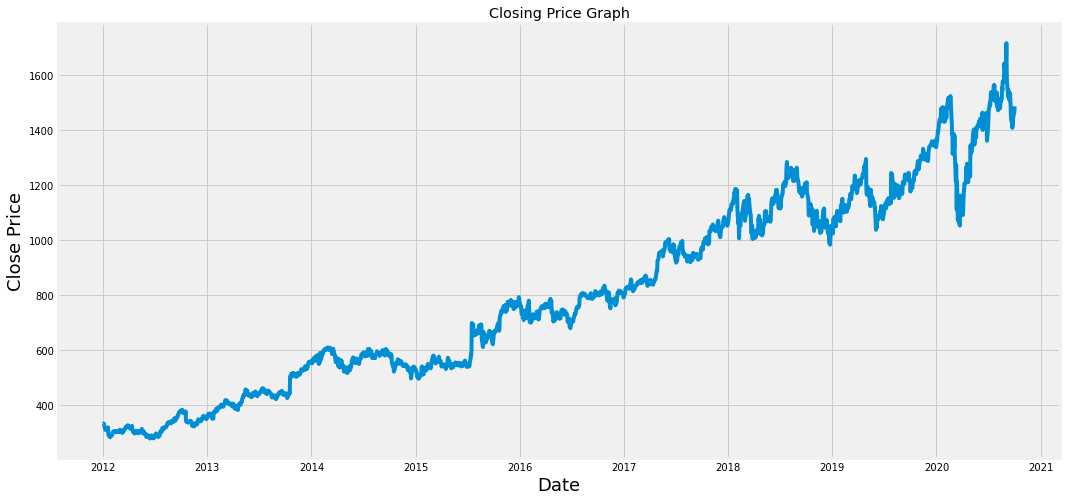

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Closing Price Graph')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [ ]:
# get only close column
data = df.filter(['Close'])
# convert to numpy array
dataset = data.values

# Segrigate Training data
training_data_len = math.ceil( len(dataset) * .8 ) # 80 percent of data is used for training

training_data_len

1762

In [ ]:
# scaling data
scaler = MinMaxScaler(feature_range=(0,1))

scaled_data =  scaler.fit_transform(dataset)

scaled_data

array([[0.03702961],
       [0.03802883],
       [0.03480144],
       ...,
       [0.82514428],
       [0.82485209],
       [0.84036425]])

In [ ]:
# creating the training dataset
train_data = scaled_data[0:training_data_len, :]

# split the data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append( train_data[i-60:i, 0] )
  y_train.append( train_data[i, 0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.03702961, 0.03802883, 0.03480144, 0.03167153, 0.02207641,
       0.02231317, 0.02329496, 0.02457616, 0.02295724, 0.02420712,
       0.02571461, 0.02803332, 0.00937926, 0.00921561, 0.00761761,
       0.00363472, 0.00315078, 0.00728685, 0.00648957, 0.00733211,
       0.00758279, 0.00907287, 0.01297917, 0.01742161, 0.01661389,
       0.0176862 , 0.01824673, 0.01631448, 0.01850436, 0.01765486,
       0.01619261, 0.01652685, 0.01587232, 0.01913104, 0.01702122,
       0.01638411, 0.0177036 , 0.0174982 , 0.02065944, 0.0206107 ,
       0.02205552, 0.02165516, 0.01921808, 0.01598372, 0.01662433,
       0.0167427 , 0.01434392, 0.01604987, 0.02044705, 0.01982387,
       0.02161338, 0.02297465, 0.02608715, 0.02591656, 0.02817606,
       0.03028937, 0.02908474, 0.03143131, 0.03062707, 0.03366994])]
[0.031111012611514693]



In [ ]:
# convert the x_train and y_train to numpy arr
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1] , 1))
x_train.shape

(1702, 60, 1)

Here you go we got the 3D shape for our array

In [ ]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1) ))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1702/1702 [==============================] - 36s 21ms/step - loss: 9.6054e-04
Epoch 2/10
1702/1702 [==============================] - 35s 20ms/step - loss: 4.0828e-04
Epoch 3/10
1702/1702 [==============================] - 35s 21ms/step - loss: 3.1034e-04
Epoch 4/10
1702/1702 [==============================] - 36s 21ms/step - loss: 2.5382e-04
Epoch 5/10
1702/1702 [==============================] - 35s 21ms/step - loss: 1.9740e-04
Epoch 6/10
1702/1702 [==============================] - 35s 21ms/step - loss: 1.5875e-04
Epoch 7/10
1702/1702 [==============================] - 35s 21ms/step - loss: 1.7016e-04
Epoch 8/10
1702/1702 [==============================] - 35s 20ms/step - loss: 1.5084e-04
Epoch 9/10
1702/1702 [==============================] - 34s 20ms/step - loss: 1.6361e-04
Epoch 10/10
1702/1702 [==============================] - 35s 21ms/step - loss: 1.3332e-04


In [ ]:
# create test dataset
test_data = scaled_data[training_data_len - 60: ,  :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
x_test = np.array(x_test)

In [ ]:
#Reshape Data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
# get the model's predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
# root mean squared error RMSE
rmse = np.sqrt( np.mean( predictions - y_test) **2 )
rmse

15.869787458939985

Near to zero is more accurate

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


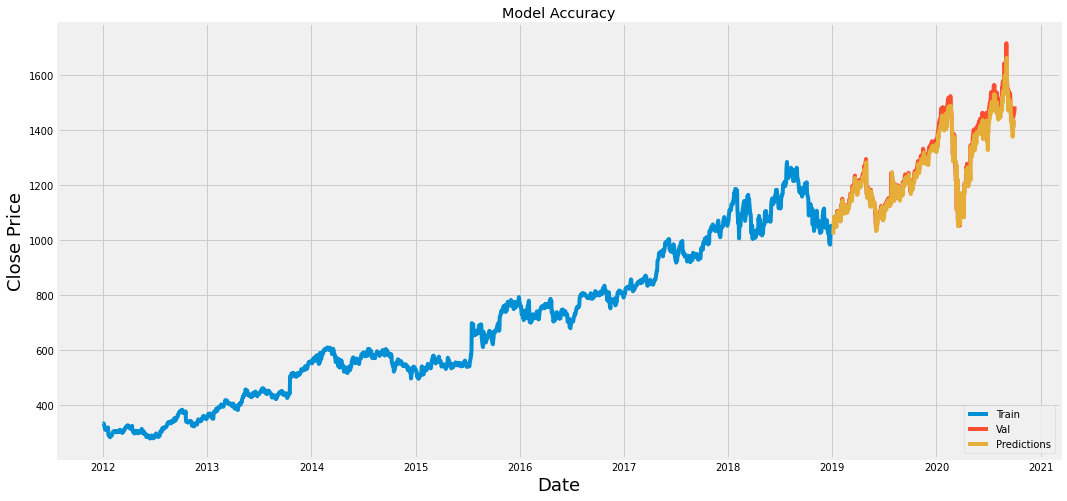

In [ ]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model Accuracy')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# show the valid and predictions
valid

,Close,Predictions
Date,,
2019-01-04,1078.069946,1021.982361
2019-01-07,1075.920044,1082.301758
2019-01-08,1085.369995,1069.852783
2019-01-09,1081.650024,1086.995361
2019-01-10,1078.829956,1077.947754
...,...,...
2020-09-25,1439.060059,1407.000854
2020-09-28,1458.660034,1413.537598
2020-09-29,1466.020020,1436.935303


In [ ]:
# Trying with future prices
apple_quote = web.DataReader('GOOGL', data_source='yahoo', start='2012-01-01', end='2020-08-20')

new_df = apple_quote.filter(['Close'])

# Last 60 days

last_60_days = new_df[-60:].values
#Scale data to 0 to 1

last_60_days_scaled = scaler.transform(last_60_days)

X_test =[]

X_test.append(last_60_days_scaled)

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[[1543.0382]]


In [ ]:
apple_quote2 = web.DataReader('GOOGL', data_source='yahoo', start='2020-08-10', end='2020-08-20')
print(apple_quote2['Close'])

Date
2020-08-10    1496.819946
2020-08-11    1480.540039
2020-08-12    1507.239990
2020-08-13    1516.650024
2020-08-14    1504.630005
2020-08-17    1516.239990
2020-08-18    1555.780029
2020-08-19    1544.609985
2020-08-20    1576.250000
Name: Close, dtype: float64
